In [1]:
from os import listdir
import numpy as np
import pandas as pd

In [2]:
datapath =r'C:\Users\User\Desktop\程式交易\歷史資料\大陸期貨連續月資料'
files = listdir(datapath)

In [3]:
namelist=[]
for i in files:
    if 'Difference.txt' in i:
        namelist.append(i)
print(namelist[0:5])

['a-60-OpenInterest-Difference.txt', 'ag-60-OpenInterest-Difference.txt', 'al-60-OpenInterest-Difference.txt', 'AP-60-OpenInterest-Difference.txt', 'au-60-OpenInterest-Difference.txt']


# 問題
1. 09:01的時間會不見  
2. 最後兩排不知道是甚麼

In [4]:
size='D'
for i in namelist:
    data = pd.read_csv(datapath+ '\\' +i,sep = ',',engine='python',encoding = 'utf-8')
    data.columns=(['date','Open','High','Low','Close','Volume','Outstanding'])
    data['date']=pd.to_datetime(data['date'])
    data.set_index('date' , inplace=True)
    
    data_open=data.loc[:,'Open'].resample(size).first().dropna()
    data_high=data.loc[:,'High'].resample(size).max().dropna()
    data_low=data.loc[:,'Low'].resample(size).min().dropna()
    data_close=data.loc[:,'Close'].resample(size).last().dropna()
    data_volumn=data.loc[:,'Volume'].resample(size).sum().dropna()
    data_outstanding=data.loc[:,'Outstanding'].resample(size).last().dropna()
    locals()[i[:i.index('-')]+'_data']=pd.concat([data_open,data_high,data_close,data_low,data_volumn,data_outstanding],axis=1).dropna()
    locals()[i[:i.index('-')]+'_data']['Return(%)']=(locals()[i[:i.index('-')]+'_data']['Close']-locals()[i[:i.index('-')]+'_data']['Close'].shift(1))/locals()[i[:i.index('-')]+'_data']['Close'].shift(1)*100

In [5]:
abbrevlist=[]             #abbreviation of namelist
for i in namelist:
    i=i[:i.index('-')]
    abbrevlist.append(i)

In [6]:
Total_Return=[]
Total_Return=pd.DataFrame(Total_Return)
for j in abbrevlist:
    Total_Return[j]=locals()[j+'_data']['Close']['2013/1/1':'2019/1/1']

# 找出每個資料的時間
把時分秒弄掉

In [7]:
import time
for k in abbrevlist:
    print (k,'=',locals()[k+'_data'].index[0],'~',locals()[k+'_data'].index[-1])

a = 2003-08-04 00:00:00 ~ 2019-03-22 00:00:00
ag = 2012-05-11 00:00:00 ~ 2019-03-22 00:00:00
al = 2003-08-04 00:00:00 ~ 2019-03-22 00:00:00
AP = 2017-12-26 00:00:00 ~ 2019-03-22 00:00:00
au = 2008-01-10 00:00:00 ~ 2019-03-22 00:00:00
b = 2004-12-23 00:00:00 ~ 2019-03-22 00:00:00
bu = 2013-10-10 00:00:00 ~ 2019-03-22 00:00:00
c = 2004-09-23 00:00:00 ~ 2019-03-22 00:00:00
CF = 2004-06-01 00:00:00 ~ 2019-03-22 00:00:00
cs = 2014-12-22 00:00:00 ~ 2019-03-22 00:00:00
cu = 2003-08-04 00:00:00 ~ 2019-03-22 00:00:00
CY = 2017-08-23 00:00:00 ~ 2019-03-22 00:00:00
eg = 2018-12-11 00:00:00 ~ 2019-03-22 00:00:00
FG = 2012-12-04 00:00:00 ~ 2019-03-22 00:00:00
fu = 2004-08-26 00:00:00 ~ 2019-03-22 00:00:00
hc = 2014-03-24 00:00:00 ~ 2019-03-22 00:00:00
i = 2013-10-21 00:00:00 ~ 2019-03-22 00:00:00
IC = 2015-04-21 00:00:00 ~ 2019-03-22 00:00:00
IF = 2012-05-25 00:00:00 ~ 2019-03-22 00:00:00
IH = 2015-05-04 00:00:00 ~ 2019-03-22 00:00:00
j = 2011-04-18 00:00:00 ~ 2019-03-22 00:00:00
jd = 2013-11-11 00

# 大連與鄭州交易所所有有夜盤的商品
testnamelist=['FG','MA','SR','TA','RM','OI','CF','CY','ZC','i','j','jm','a','b','m','p','y']
1. 先去掉CY 因為資料從2017年開始


In [8]:
testnamelist=['FG','MA','SR','TA','RM','OI','CF','CY','ZC','i','j','jm','a','b','m','p','y']
for k in testnamelist:
    print (k,'=',locals()[k+'_data'].index[0],'~',locals()[k+'_data'].index[-1])

FG = 2012-12-04 00:00:00 ~ 2019-03-22 00:00:00
MA = 2014-07-18 00:00:00 ~ 2019-03-22 00:00:00
SR = 2006-01-09 00:00:00 ~ 2019-03-22 00:00:00
TA = 2006-12-19 00:00:00 ~ 2019-03-22 00:00:00
RM = 2012-12-31 00:00:00 ~ 2019-03-22 00:00:00
OI = 2011-07-04 00:00:00 ~ 2019-03-22 00:00:00
CF = 2004-06-01 00:00:00 ~ 2019-03-22 00:00:00
CY = 2017-08-23 00:00:00 ~ 2019-03-22 00:00:00
ZC = 2015-12-21 00:00:00 ~ 2019-03-22 00:00:00
i = 2013-10-21 00:00:00 ~ 2019-03-22 00:00:00
j = 2011-04-18 00:00:00 ~ 2019-03-22 00:00:00
jm = 2013-03-25 00:00:00 ~ 2019-03-22 00:00:00
a = 2003-08-04 00:00:00 ~ 2019-03-22 00:00:00
b = 2004-12-23 00:00:00 ~ 2019-03-22 00:00:00
m = 2003-08-04 00:00:00 ~ 2019-03-22 00:00:00
p = 2007-10-30 00:00:00 ~ 2019-03-22 00:00:00
y = 2006-01-18 00:00:00 ~ 2019-03-22 00:00:00


In [9]:
Test_Return=[]
Test_Return=pd.DataFrame(Test_Return)
for j in testnamelist:
    Test_Return[j]=locals()[j+'_data']['Close']['2018/5/1':'2019/3/22']

In [10]:
ans=Test_Return.corr()
ans['m']

FG    0.112057
MA    0.753620
SR    0.033509
TA    0.153687
RM    0.847058
OI    0.132599
CF    0.329802
CY    0.125652
ZC    0.210993
i    -0.526790
j    -0.034385
jm   -0.540685
a     0.732245
b     0.855387
m     1.000000
p     0.455450
y     0.457361
Name: m, dtype: float64

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,4))
xxx=m_data['2010/1/1':]['Close']-RM_data['2010/1/1':]['Close']
plt.plot(xxx,'r')


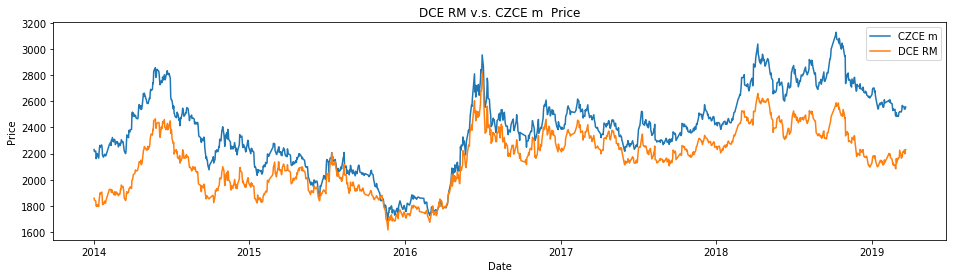

In [12]:
plt.figure(figsize=(16,4))
plt.title('DCE RM v.s. CZCE m  Price') 
plt.xlabel('Date') 
plt.ylabel('Price')
plt.plot(m_data['2014/1/1':]['Close'],label='CZCE m')
plt.plot(RM_data['2014/1/1':]['Close'],label='DCE RM')
plt.legend(loc='upper right')

In [13]:
size='D'
datapath1=r'C:\Users\User\Desktop\美豆.txt'
CBOT_Soybean = pd.read_csv(datapath1,sep = ',',engine='python',encoding = 'utf-8')
CBOT_Soybean['Date']=CBOT_Soybean['Date']+' '+CBOT_Soybean['Time']
CBOT_Soybean=CBOT_Soybean.drop('Time',axis=1)
CBOT_Soybean.columns

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\User\\Desktop\\美豆.txt'

In [ ]:
CBOT_Soybean['Date']=pd.to_datetime(CBOT_Soybean['Date'])
CBOT_Soybean.set_index('Date' , inplace=True)

data_open=CBOT_Soybean.loc[:,'Open'].resample(size).first().dropna()
data_high=CBOT_Soybean.loc[:,'High'].resample(size).max().dropna()
data_low=CBOT_Soybean.loc[:,'Low'].resample(size).min().dropna()
data_close=CBOT_Soybean.loc[:,'Close'].resample(size).last().dropna()
data_Total_Volumn=CBOT_Soybean.loc[:,'TotalVolume'].resample(size).sum().dropna()
CBOT_Soybean=pd.concat([data_open,data_high,data_close,data_low,data_volumn,data_Total_Volumn],axis=1).dropna()
CBOT_Soybean['Return(%)']=(CBOT_Soybean['Close']-CBOT_Soybean['Close'].shift(1))/CBOT_Soybean['Close'].shift(1)*100

In [ ]:
CBOT_Soybean.index

In [ ]:
Test_Return['CBOT_Soybean']=CBOT_Soybean['Close']
ans2=Test_Return.corr()
ans2['CBOT_Soybean']

# 檢測大豆、豆粕、豆油三者交易量

In [ ]:
plt.figure(figsize=(16,4))
plt.title('B/m/y Volume test') 
plt.xlabel('Date') 
plt.ylabel('Price')
#plt.plot(m_data[:]['Volume'],label='m')
plt.plot(b_data['2018/4/1':]['Volume'],label='b')
#plt.plot(y_data[:]['Volume'],label='y')
#plt.plot(a_data['2014/1/1':'2018/8/1']['Close'],label='DCE a')
#plt.plot(CBOT_Soybean['2014/1/1':'2018/8/1']['Close'],label='CBOT_Soybean')
plt.legend(loc='upper right')

# 計算利潤

In [ ]:
profit=[]
profit=pd.DataFrame(profit)
m_factor=0.73
y_factor=0.18
profit = m_factor * m_data['Close'] + y_factor * y_data['Close']-b_data['Close']

In [ ]:
plt.figure(figsize=(16,4))
startDay='2018/5/1'
plt.plot(profit[startDay:],label='Profit')
plt.legend(loc='upper right')

In [ ]:
plt.figure(figsize=(16,4))
startDay='2018/5/1'
plt.plot(b_data[startDay:]['Volume'],label='b')
plt.plot(m_data[startDay:]['Volume'],label='m')
plt.plot(y_data[startDay:]['Volume'],label='y')
plt.legend(loc='upper right')

In [ ]:
Test_Return['Profit']=profit

In [ ]:
ans3=Test_Return.corr()

In [ ]:
ans3['Profit']